In [5]:
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
# load model from path
model= tf.saved_model.load(r"/content/faster_rcnn")
# model= tf.saved_model.load(r"/content/saved_model.pb")

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [6]:
class_names = pd.read_csv(r"/content/coco_classes.csv")

In [7]:
class_names

,ID,Class
0,1,person
1,2,bicycle
2,3,car
3,4,motorcycle
4,5,airplane
...,...,...
75,86,vase
76,87,scissors
77,88,teddy bear
78,89,hair drier


In [8]:
class_names =dict(zip(class_names["ID"], class_names["Class"]))

In [9]:
class_names

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [10]:
len(class_names)

80

In [11]:
class_names[37]

'sports ball'

### Load Image

In [12]:
img = load_img(r"/content/images_for_obj_det_2 (1).jpg")
img = np.array(img)

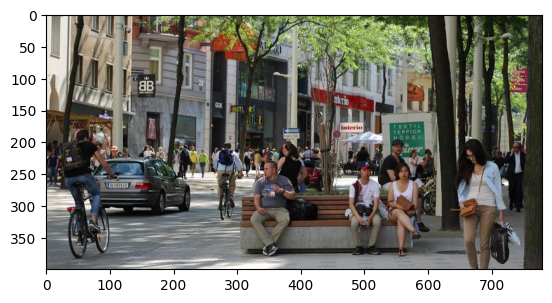

In [13]:
plt.imshow(img)
plt.show()

In [14]:
# get height and width of image
h, w, _ = img.shape

input_tensor = np.expand_dims(img, 0)

# # predict from model
resp = model(input_tensor)

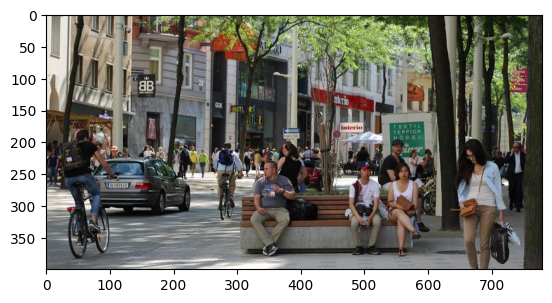

In [15]:
plt.imshow(img)
plt.show()

In [16]:
resp.keys()

dict_keys(['raw_detection_boxes', 'detection_multiclass_scores', 'detection_classes', 'detection_boxes', 'raw_detection_scores', 'num_detections', 'detection_anchor_indices', 'detection_scores'])

In [17]:
resp["detection_boxes"]

<tf.Tensor: shape=(1, 300, 4), dtype=float32, numpy=
array([[[0.55215156, 0.40242562, 0.94190145, 0.5080702 ],
        [0.6317919 , 0.03900341, 0.9560607 , 0.13002928],
        [0.49478185, 0.8298403 , 0.9933723 , 0.926655  ],
        ...,
        [0.7170755 , 0.73577577, 0.87162405, 0.7731125 ],
        [0.615899  , 0.5792892 , 0.69408303, 0.614207  ],
        [0.5269981 , 0.29270944, 0.58819795, 0.30416614]]], dtype=float32)>

In [18]:
resp["detection_classes"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[ 1.,  2.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,
         1., 31., 41.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1., 31.,  1.,  1.,  1.,  3., 31., 28.,  2.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1., 27.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1., 33.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,
        27.,  1., 31., 31.,  1., 27.,  1.,  1.,  1.,  8.,  1., 31.,  4.,
        40.,  1., 33.,  1.,  1.,  1., 31.,  1.,  1.,  2.,  1.,  1., 27.,
        31., 31., 31., 31., 27., 33.,  1.,  1., 31.,  1.,  1.,  1.,  1.,
        31.,  4., 41., 27., 27., 40.,  1., 31., 31., 43.,  1., 31., 62.,
         1., 27., 31.,  4.,  1.,  1., 27., 31.,  1.,  1., 27.,  1.,  1.,
        31.,  1.,  3., 43., 40.,  1., 31.,  1., 62., 27., 31., 33., 27.,
        27.,  1., 62., 15.,  1., 31.,  1.,  4.,  1., 27., 27., 31.,  4.,
 

In [19]:
resp["detection_scores"]

<tf.Tensor: shape=(1, 300), dtype=float32, numpy=
array([[0.99482715, 0.98715484, 0.98405373, 0.97922355, 0.9693056 ,
        0.9669167 , 0.96537256, 0.9647247 , 0.9622408 , 0.8700059 ,
        0.79909295, 0.7813977 , 0.7452649 , 0.70130765, 0.6849734 ,
        0.6183923 , 0.607169  , 0.59936017, 0.59079695, 0.55584234,
        0.5516871 , 0.45126647, 0.4421549 , 0.42808652, 0.41115612,
        0.39598304, 0.34348926, 0.33189422, 0.29489735, 0.2868854 ,
        0.27544904, 0.27531877, 0.2573153 , 0.25269628, 0.25073108,
        0.24408646, 0.23256366, 0.22894832, 0.22884777, 0.22746517,
        0.19483995, 0.19099632, 0.18788974, 0.18683791, 0.18349896,
        0.16163544, 0.16074821, 0.14620139, 0.14328419, 0.13366385,
        0.12992822, 0.12917256, 0.12172057, 0.11838412, 0.11616591,
        0.11408719, 0.11276413, 0.11264679, 0.10969807, 0.09914595,
        0.09818705, 0.09772978, 0.09753343, 0.09521169, 0.09470645,
        0.08817792, 0.08278424, 0.07495812, 0.07486323, 0.07290826

In [20]:
img2 = img

In [21]:
# iterate over boxes, class_index and score list
for boxes, classes, scores in zip(resp['detection_boxes'].numpy(), resp['detection_classes'].numpy().astype(int), resp['detection_scores'].numpy()):
    for box, cls, score in zip(boxes, classes, scores): # iterate over sub values in list
        if score > 0.5: # we are using only detection with confidence of over 0.8
            ymin = int(box[0] * h)
            xmin = int(box[1] * w)
            ymax = int(box[2] * h)
            xmax = int(box[3] * w)
            # write text classname for bounding box
            cv2.putText(img2, class_names[cls], (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (255, 0, 0), 1)
            # draw on image (bounding box)
            cv2.rectangle(img2, (xmin, ymin), (xmax, ymax), (300, 0, 300), 1)
            # print(class_names[cls])

# convert back to bgr and save image
cv2.imwrite("output3.png", cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

True

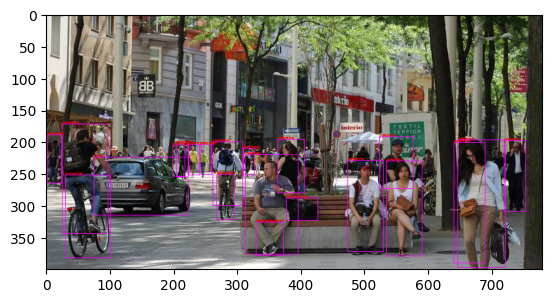

In [22]:
plt.imshow(img2)
plt.show()